<a href="https://colab.research.google.com/github/Stacy067/Data-Analysis-for-Python/blob/main/5_3_%EA%B3%BC%EC%A0%9C_%EA%B4%80%EC%8B%AC%EC%9E%88%EB%8A%94_%EC%9D%98%EC%95%BD%ED%92%88(%ED%83%80%EC%9D%B4%EB%A0%88%EB%86%80)_%EC%B2%98%EB%B0%A9%EC%A0%95%EB%B3%B4_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0_%EA%B9%80%EC%84%9C%ED%98%84_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 의약품 처방정보
* https://www.data.go.kr/data/15007117/fileData.do

* 의약품처방정보는 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터입니다.

* <img src="https://i.imgur.com/hsrpJp4.png">

* 약품일반성분명코드
* http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000

* 주성분코드부여방법
* https://www.health.kr/drug_info/basedrug/main_ingredient.html


## 데이터 샘플링
* 원본 데이터는 매우 큽니다.
* 컴퓨터 개인 사양에 따라 데이터 불러오기가 되지 않을 수 있습니다. 
* 보통 메모리 8기가 정도를 사용하고 있다면 다른 프로그램에서 4G를 사용하고 있다고 가정할 때 2~3G의 데이터를 불러와서 분석할 수 있습니다.

In [ ]:
# matplotlib 시각화에서 한글폰트를 사용할 수 있게 해주는 도구
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pandas
# numpy
# matplotlib.pyplot
# seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import koreanize_matplotlib

In [ ]:
pd.read_csv("nhis_drug_sample_2020_3.csv")

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,2021-12-29
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,2021-12-29
2,2020,666699,1188743,3,2,11,48,2020-08-31,367202ATB,1.0,1,30,1078.0,32340,2021-12-29
3,2020,666699,1188743,1,2,11,48,2020-08-31,222901ATB,1.0,2,30,103.0,6180,2021-12-29
4,2020,666699,1188743,4,2,11,48,2020-08-31,244301ATB,1.0,2,30,81.0,4860,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79746,2020,999867,830095,2,1,15,26,2020-11-20,183231COS,1.0,1,2,4044.0,8088,2021-12-29
79747,2020,999867,830095,1,1,15,26,2020-11-20,180138COS,1.0,1,2,3882.0,7764,2021-12-29
79748,2020,999867,12770105,3,1,15,26,2020-09-11,530029COS,1.0,1,1,4440.0,4440,2021-12-29
79749,2020,999867,12770105,2,1,15,26,2020-09-11,183231COS,1.0,1,1,4044.0,4044,2021-12-29


In [ ]:
import os

print("현재 작업 경로:", os.getcwd())
os.listdir()

현재 작업 경로: /content


['.config', 'nhis_drug_sample_2020_3.csv', 'sample_data']

##한글 폰트

In [ ]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 합니다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
import matplotlib.pyplot as plt
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: ca

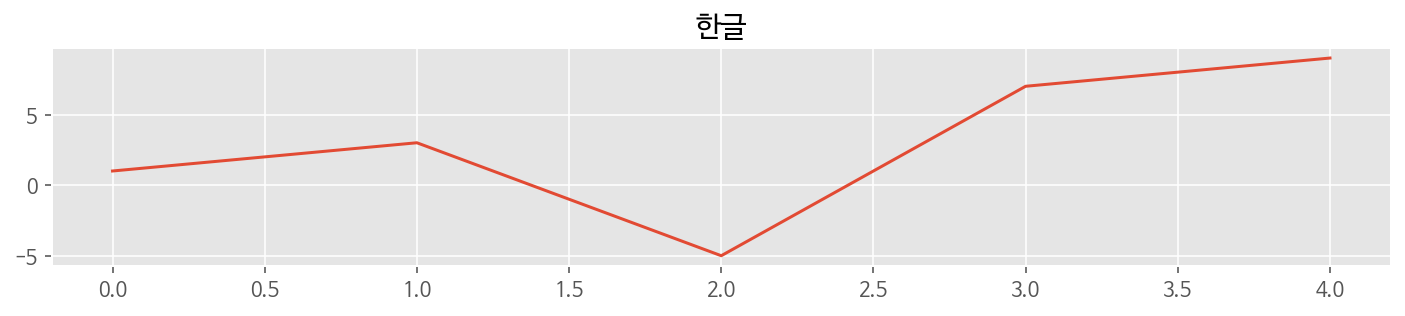

In [ ]:
pd.Series([1, 3, -5, 7, 9]).plot(title="한글", figsize=(12, 2))

##데이터 불러오기

In [ ]:
# df
df = pd.read_csv("nhis_drug_sample_2020_3.csv")
df.shape

(79751, 15)

In [ ]:
# 처음 n개의 행을 반환합니다.
# 지정하지 않으면 5개의 행을 반환합니다.
df.head(2)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666699,1188743,2,2,11,48,2020-08-31,109931ALQ,1.0,2,30,220.0,13200,2021-12-29
1,2020,666699,1188743,5,2,11,48,2020-08-31,146602ACH,1.0,2,30,184.0,11040,2021-12-29


##탈모치료제 데이터 가져오기

In [ ]:
#아보다트 458801ACS
#스테파론 160834CLQ	
#비스덤 106430CCM
#레더코트 243203ATB
#유데노론 243335BIJ
#트리코트 243339COM

bald = {"458801ACS":"아보다트",
"160834CLQ":"스테파론",
"106430CCM":"비스덤",
"243203ATB":"레더코트",
"243335BIJ":"유데노론",
"243339COM":"트리코트"}
bald

{'106430CCM': '비스덤',
 '160834CLQ': '스테파론',
 '243203ATB': '레더코트',
 '243335BIJ': '유데노론',
 '243339COM': '트리코트',
 '458801ACS': '아보다트'}

In [ ]:
df["탈모치료제"]= df["약품일반성분명코드"].map(bald)



In [ ]:
df = df.dropna()

In [ ]:
df[["탈모치료제", "약품일반성분명코드"]].sample()

,탈모치료제,약품일반성분명코드
31826,레더코트,243203ATB


In [ ]:
badf_bald.index

RangeIndex(start=0, stop=6, step=1)

## 타이레놀 데이터만 가져오기

In [ ]:
# 타이레놀

df = df[df["약품일반성분명코드"] == "101401ATB"]
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,2021-12-29
12362,2020,718829,5573829,2,1,2,11,2020-04-26,101401ATB,1.6667,3,3,26.0,390,2021-12-29
19320,2020,740217,5274991,2,2,2,30,2020-10-16,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19324,2020,740217,12274869,2,2,2,30,2020-08-07,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19335,2020,740217,12503153,2,2,2,30,2020-08-03,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19345,2020,740217,3726458,2,2,2,30,2020-12-07,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19347,2020,740217,6105218,2,2,2,30,2020-10-12,101401ATB,2.1667,3,3,26.0,507,2021-12-29
21775,2020,753255,855349,3,1,13,11,2020-04-17,101401ATB,1.0000,2,3,26.0,156,2021-12-29
21795,2020,753255,9463502,4,1,13,11,2020-05-19,101401ATB,1.0000,2,5,26.0,260,2021-12-29
21810,2020,753255,12232533,4,1,13,11,2020-05-25,101401ATB,1.0000,2,5,26.0,260,2021-12-29


##데이터 요약하기

In [ ]:
# DataFrame의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         0 non-null      int64  
 1   가입자 일련번호     0 non-null      int64  
 2   처방내역일련번호     0 non-null      int64  
 3   일련번호         0 non-null      int64  
 4   성별코드         0 non-null      int64  
 5   연령대코드(5세단위)  0 non-null      int64  
 6   시도코드         0 non-null      int64  
 7   요양개시일자       0 non-null      object 
 8   약품일반성분명코드    0 non-null      object 
 9   1회 투약량       0 non-null      float64
 10  1일투약량        0 non-null      int64  
 11  총투여일수        0 non-null      int64  
 12  단가           0 non-null      float64
 13  금액           0 non-null      int64  
 14  데이터 공개일자     0 non-null      object 
dtypes: float64(2), int64(10), object(3)
memory usage: 0.0+ bytes


In [ ]:
# 타이레놀 

df = df[df["약품일반성분명코드"] == "101401ATB"]
df

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,2021-12-29
12362,2020,718829,5573829,2,1,2,11,2020-04-26,101401ATB,1.6667,3,3,26.0,390,2021-12-29
19320,2020,740217,5274991,2,2,2,30,2020-10-16,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19324,2020,740217,12274869,2,2,2,30,2020-08-07,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19335,2020,740217,12503153,2,2,2,30,2020-08-03,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19345,2020,740217,3726458,2,2,2,30,2020-12-07,101401ATB,2.1667,3,3,26.0,507,2021-12-29
19347,2020,740217,6105218,2,2,2,30,2020-10-12,101401ATB,2.1667,3,3,26.0,507,2021-12-29
21775,2020,753255,855349,3,1,13,11,2020-04-17,101401ATB,1.0000,2,3,26.0,156,2021-12-29
21795,2020,753255,9463502,4,1,13,11,2020-05-19,101401ATB,1.0000,2,5,26.0,260,2021-12-29
21810,2020,753255,12232533,4,1,13,11,2020-05-25,101401ATB,1.0000,2,5,26.0,260,2021-12-29


In [ ]:
# 한번 처방받을 때 함께 받는 일련번호 갯수
df[df["일련번호"]==17]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자


In [ ]:
#17가지 약을 처방받은 사람 찾기

df[df["가입자 일련번호"] == 679667]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자


In [ ]:
df[df["처방내역일련번호"] == 1058236]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자


In [ ]:
df.loc[df["처방내역일련번호"] == 1058236, "금액"].sum()

0

##데이터 전처리

In [ ]:
# 결측치의 합을 출력합니다.
# 결측치의 합을 출력하면 결측치가 몇 개 있는지 확인할 수 있습니다.
df.isnull().sum()

기준년도           0
가입자 일련번호       0
처방내역일련번호       0
일련번호           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
요양개시일자         0
약품일반성분명코드      0
1회 투약량         0
1일투약량          0
총투여일수          0
단가             0
금액             0
데이터 공개일자       0
dtype: int64

In [ ]:
# 결측치가 포함된 행은 삭제하겠습니다.
# 결과를 확인합니다.
df = df.dropna()
df.shape

(55, 15)

In [ ]:
# "데이터 공개일자" 를 제거합니다.
del df["데이터 공개일자"]

In [ ]:
df.shape

(55, 14)

In [ ]:
# 깊은 복사 : copy시 원본에 영향을 주지 않음
df = df.copy()

In [ ]:
# "요양개시일자" 변수를 pandas의 datetime 자료형으로 바꾸겠습니다.
# "요양개시일자" 변수의 format은 "%Y%m%d"입니다.
# %Y는 4글자로 된 연도 데이터를 의미합니다. %y는 2글자로 된 연도 데이터를 의미합니다.
# %m, %d는 2글자로 된 월, 일 데이터를 의미합니다.
# 데이터 윗부분 일부 행을 확인합니다.
# 데이터 윗부분 일부 행을 확인합니다.
df['요양개시일자'] = pd.to_datetime(df['요양개시일자'])

In [ ]:
# df를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1296 to 79601
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   기준년도         55 non-null     int64         
 1   가입자 일련번호     55 non-null     int64         
 2   처방내역일련번호     55 non-null     int64         
 3   일련번호         55 non-null     int64         
 4   성별코드         55 non-null     int64         
 5   연령대코드(5세단위)  55 non-null     int64         
 6   시도코드         55 non-null     int64         
 7   요양개시일자       55 non-null     datetime64[ns]
 8   약품일반성분명코드    55 non-null     object        
 9   1회 투약량       55 non-null     float64       
 10  1일투약량        55 non-null     int64         
 11  총투여일수        55 non-null     int64         
 12  단가           55 non-null     float64       
 13  금액           55 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 6.4+ KB


##파생변수 만들기 - 월, 일, 요일

In [ ]:
# 연월일 데이터는 여러 변수로 나뉠 수 있습니다.
# 월, 일, 요일 코드, 영문 요일로 변수를 나누겠습니다.
# "요양개시일자" 변수에서 월을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 일을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 요일을 새로운 변수로 만듭니다.
# 요일은 0~6의 숫자가 월~일에 대응되는 형태로 변환됩니다.
# "요양개시일자" 변수에서 영문 요일을 새로운 변수로 만듭니다.
df['월'] = df['요양개시일자'].dt.month
df['일'] = df['요양개시일자'].dt.day
df['요일'] = df['요양개시일자'].dt.dayofweek
df['영문요일'] = df["요양개시일자"].dt.day_name()

In [ ]:
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,1,26,6,Sunday
12362,2020,718829,5573829,2,1,2,11,2020-04-26,101401ATB,1.6667,3,3,26.0,390,4,26,6,Sunday
19320,2020,740217,5274991,2,2,2,30,2020-10-16,101401ATB,2.1667,3,3,26.0,507,10,16,4,Friday
19324,2020,740217,12274869,2,2,2,30,2020-08-07,101401ATB,2.1667,3,3,26.0,507,8,7,4,Friday
19335,2020,740217,12503153,2,2,2,30,2020-08-03,101401ATB,2.1667,3,3,26.0,507,8,3,0,Monday


In [ ]:
# max_columns 의 수를 지정합니다.
pd.options.display.max_columns = None

##파생변수 만들기 - 시도

In [ ]:
# 해당 데이터에서 사용하는 대한민국 시도코드 정보입니다.
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""
city

'11 서울특별시\n42 강원도\n26 부산광역시\n43 충청북도\n27 대구광역시\n44 충청남도\n28 인천광역시\n45 전라북도\n29 광주광역시\n46 전라남도\n30 대전광역시\n47 경상북도\n31 울산광역시\n48 경상남도\n36 세종특별자치시\n49 제주특별자치도\n41 경기도'

In [ ]:
# 대한민국 시도코드 정보를 python의 dictionary 형태로 변환하겠습니다.
# city를 개행문자를 기준으로 나눈 리스트로 바꿉니다.
# 새로운 dict를 선언합니다.
# for 문을 이용해 리스트 안의 내용을 하나씩 다룹니다.
# 시도코드와 지역 이름이 띄어쓰기를 기준으로 구분되어 있습니다.
# 띄어쓰기를 기준으로 분할하고 앞 단어는 key, 뒤 단어는 value가 되도록 dict에 삽입합니다.
# 최종 dict를 확인합니다.
city_list = city.split("\n")
city_name = {int(c.split()[0]) : c.split()[1] for c in city_list}
city_name

{11: '서울특별시',
 26: '부산광역시',
 27: '대구광역시',
 28: '인천광역시',
 29: '광주광역시',
 30: '대전광역시',
 31: '울산광역시',
 36: '세종특별자치시',
 41: '경기도',
 42: '강원도',
 43: '충청북도',
 44: '충청남도',
 45: '전라북도',
 46: '전라남도',
 47: '경상북도',
 48: '경상남도',
 49: '제주특별자치도'}

In [ ]:
# map 메서드를 이용해 시도코드에 해당하는 시도명을 갖는 변수를 만듭니다.
# df['시도명']
df["시도명"] = df["시도코드"].map(city_name)

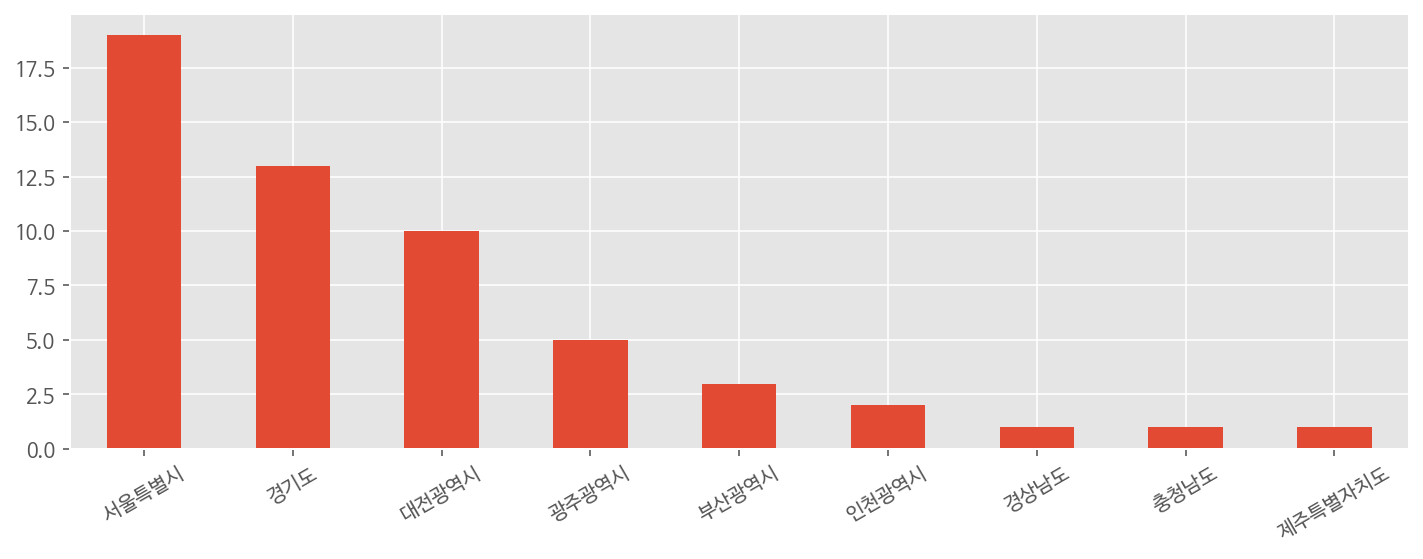

In [ ]:
df["시도명"].value_counts().plot.bar(figsize=(12,4), rot=30)

##파생변수 만들기 - 연령대

In [ ]:
# '연령대코드(5세단위)' 를 연령대로 나타낸 정보입니다.
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""
age_code

'1 00~04세 \n2 05~09세\n3 10~14세\n4 15~19세\n5 20~24세\n6 25~29세\n7 30~34세\n8 35~39세\n9 40~44세\n10 45~49세\n11 50~54세\n12 55~59세\n13 60~64세\n14 65~69세\n15 70~74세\n16 75~79세\n17 80~84세\n18 85세+'

In [ ]:
# 연령대코드 정보를 python의 dictionary 형태로 변환하겠습니다.
# age_code를 개행문자를 기준으로 나눈 리스트로 바꿉니다.
# 새로운 dict를 선언합니다.
# for 문을 이용해 리스트 안의 내용을 하나씩 다룹니다.
# 연령대코드와 연령대가 띄어쓰기를 기준으로 구분되어 있습니다.
# 띄어쓰기를 기준으로 분할하고 앞 단어는 key, 뒤 단어는 value가 되도록 dict에 삽입합니다.
# 최종 dict를 확인합니다.
age_list = age_code.split("\n")
age_dict = { int(age.split()[0]) : age.split()[1][:-1] for age in age_list}
age_dict[18] = '85세+'
age_dict

{1: '00~04',
 2: '05~09',
 3: '10~14',
 4: '15~19',
 5: '20~24',
 6: '25~29',
 7: '30~34',
 8: '35~39',
 9: '40~44',
 10: '45~49',
 11: '50~54',
 12: '55~59',
 13: '60~64',
 14: '65~69',
 15: '70~74',
 16: '75~79',
 17: '80~84',
 18: '85세+'}

In [ ]:
# map 메서드를 이용해 연령대코드에 해당하는 연령대 정보를 갖는 변수를 만듭니다.
df["연령대"] = df["연령대코드(5세단위)"].map(age_dict)

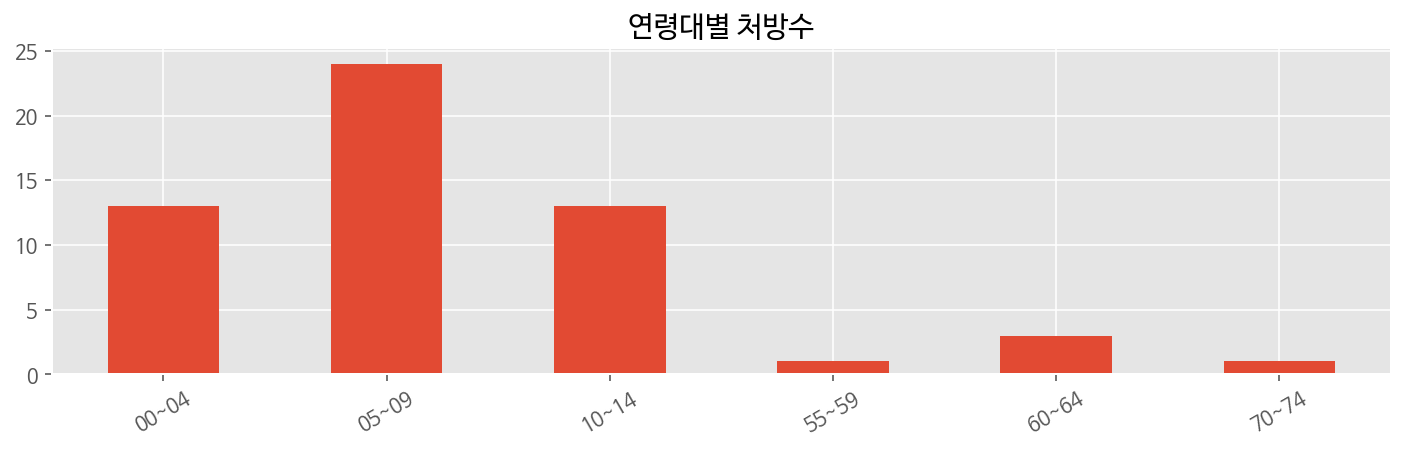

In [ ]:
df["연령대"].value_counts().sort_index().plot.bar(figsize=(12,3), title="연령대별 처방수", rot=30)

##파생변수 만들기 - 성별

In [ ]:
# 성별 코드에서 1은 남자, 2는 여자를 의미합니다.
# 위의 정보를 반영하는 새로운 dict를 선언하겠습니다.
# map 메서드를 이용하여 성별 정보를 담고 있는 "gender" 변수를 선언하겠습니다.
gender_dict = {1 : "남", 2 : "여"}
df["성별"] = df["성별코드"].map(gender_dict)

In [ ]:
df[["성별코드", "성별"]].sample(5)

,성별코드,성별
38535,2,여
19324,2,여
51737,2,여
51085,2,여
1296,2,여


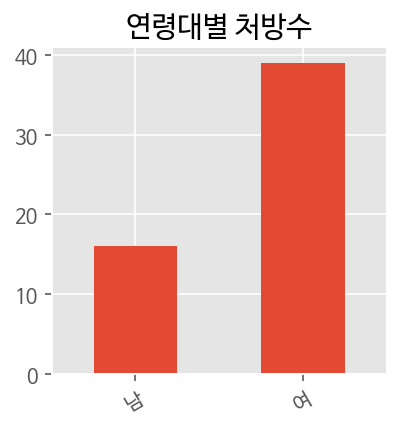

In [ ]:
df["성별"].value_counts().sort_index().plot.bar(figsize=(3,3), title="연령대별 처방수", rot=30)

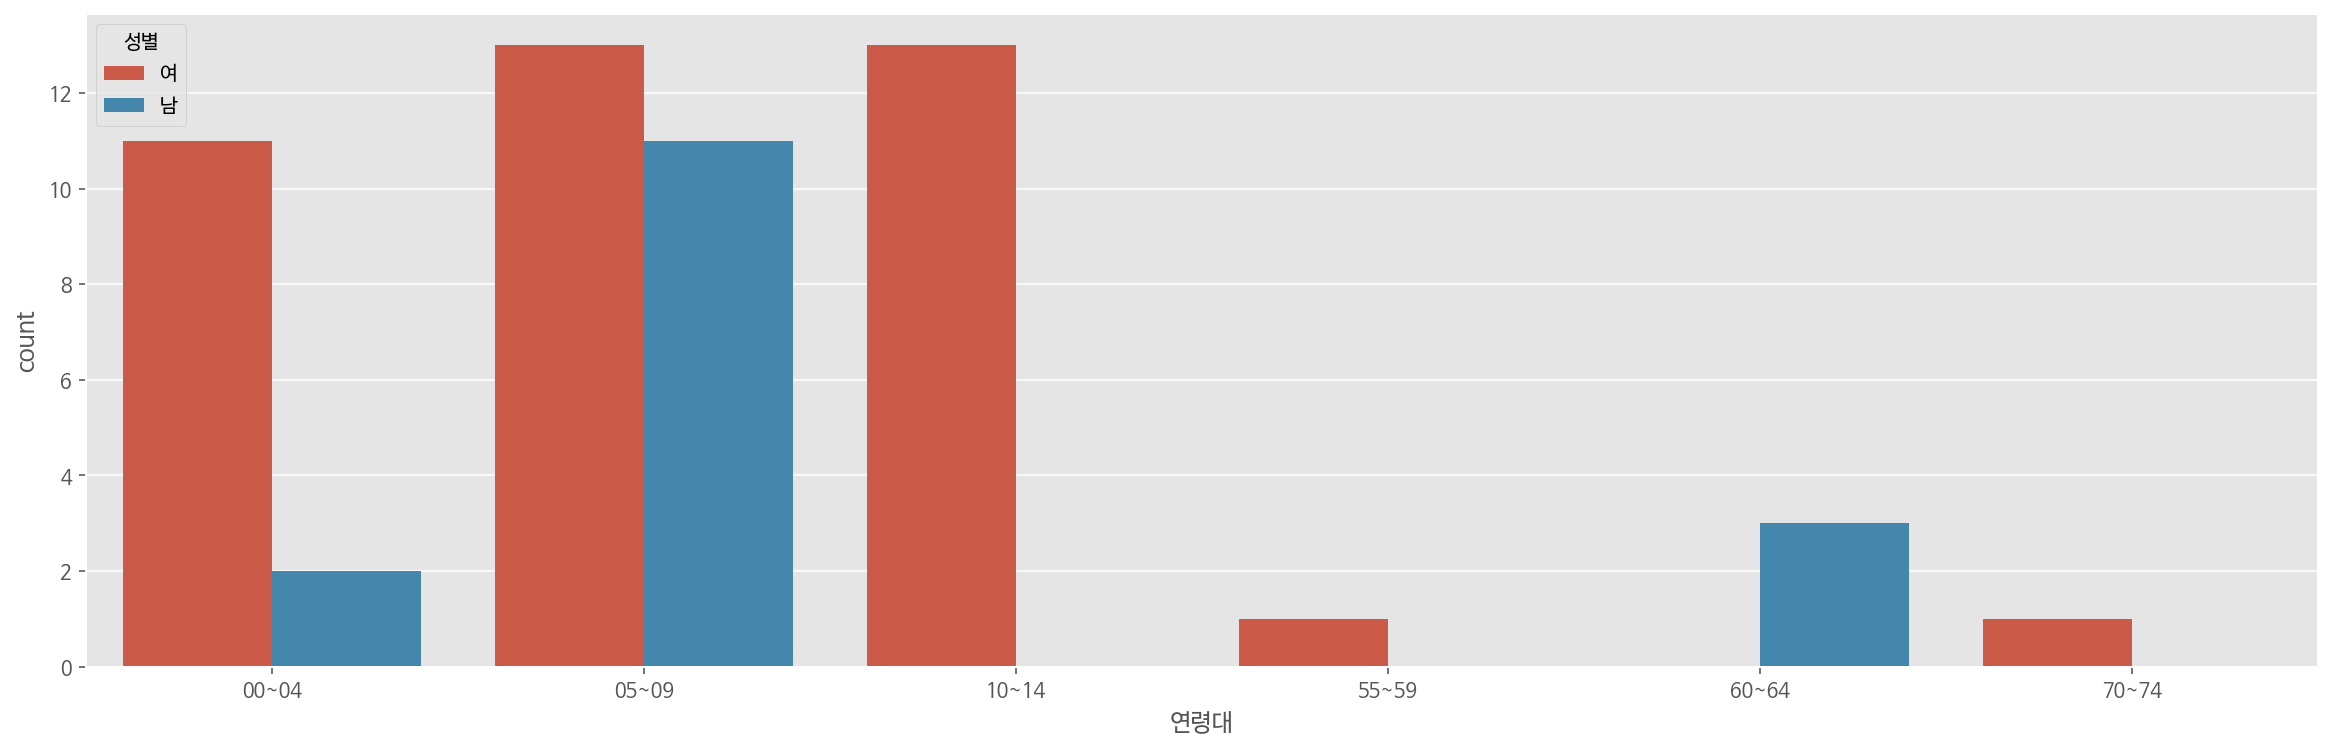

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df.sort_values("연령대"), x="연령대", hue="성별")

##파생변수 만들기 - 투여경로, 제형

In [ ]:
df.head(1)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,1,26,6,Sunday,서울특별시,00~04,여


In [ ]:
# DataFrame에서 문자열 정보에 접근하고 싶을 때 .str을 이용합니다.
# 문자열 중에서 일부 정보만 원할 경우 문자열 슬라이싱을 이용해서 일부만 가져올 수 있습니다.
# "약품일반성분명코드"에서 투여경로에 해당하는 정보만 가져와 "투여경로" 변수로 선언하겠습니다.
# "약품일반성분명코드"에서 제형에 해당하는 정보만 가져와 "제형" 변수로 선언하겠습니다.
# df를 확인합니다.

df['투여경로'] = df["약품일반성분명코드"].str[6]
df['제형'] = df["약품일반성분명코드"].str[-2:]

In [ ]:
df[["약품일반성분명코드", "투여경로", "제형"]].head()

,약품일반성분명코드,투여경로,제형
1296,101401ATB,A,TB
12362,101401ATB,A,TB
19320,101401ATB,A,TB
19324,101401ATB,A,TB
19335,101401ATB,A,TB


In [ ]:
drug_code = {d.split(":")[1].replace(",", "") : d.split(":")[0] for d in "내복제:A, 주사제:B, 외용제:C, 기타:D".split()}
drug_code

{'A': '내복제', 'B': '주사제', 'C': '외용제', 'D': '기타'}

In [ ]:
ingredient_url = "https://www.health.kr/drug_info/basedrug/main_ingredient.html"
df_ingredient = pd.read_html(ingredient_url)[1].drop(columns="동일 제형군")
df_ingredient = df_ingredient.rename(columns={"제형코드":"제형"})
df_ingredient.head(2)

,제형,제형명칭
0,TB,"정제, 저작정"
1,CH,경질캡슐제


In [ ]:
df_ingredient = pd.read_html(
    "https://www.health.kr/drug_info/basedrug/main_ingredient.html")[1].drop(columns="동일 제형군")
df_ingredient = df_ingredient.rename(columns={"제형코드": "제형"})
df_ingredient.head()

,제형,제형명칭
0,TB,"정제, 저작정"
1,CH,경질캡슐제
2,CS,연질캡슐제
3,CE,장용캡슐제
4,TE,장용정제


In [ ]:
df['투여경로명'] = df["투여경로"].map(drug_code)

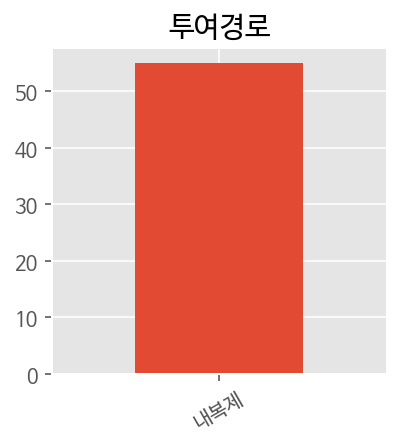

In [ ]:
df["투여경로명"].value_counts().sort_index().plot.bar(figsize=(3,3), title="투여경로", rot=30)

In [ ]:
df.head(2)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로,제형,투여경로명
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,1,26,6,Sunday,서울특별시,00~04,여,A,TB,내복제
12362,2020,718829,5573829,2,1,2,11,2020-04-26,101401ATB,1.6667,3,3,26.0,390,4,26,6,Sunday,서울특별시,05~09,남,A,TB,내복제


In [ ]:
df['제형명'] = df.merge(df_ingredient, how="left")["제형명칭"]
df[["약품일반성분명코드", "제형", "제형명"]].head(2)

,약품일반성분명코드,제형,제형명
1296,101401ATB,TB,NaN
12362,101401ATB,TB,NaN


##전체 데이터 분석 및 시각화

In [ ]:
# 기술 통계를 생성합니다.
df.describe().round(2)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일
count,55.0,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.0,55.00,55.00,55.00,55.00
mean,2020.0,854032.58,6277029.15,2.87,1.71,3.02,26.58,1.26,2.95,3.40,26.0,334.49,5.73,15.85,2.60
std,0.0,78097.47,4153621.65,1.17,0.46,3.34,12.72,0.61,0.23,1.08,0.0,214.61,3.74,9.07,2.01
min,2020.0,673578.00,23461.00,1.00,1.00,1.00,11.00,0.60,2.00,1.00,26.0,65.00,1.00,1.00,0.00
25%,2020.0,808455.00,2680745.50,2.00,1.00,2.00,11.00,0.83,3.00,3.00,26.0,195.00,1.50,7.50,1.00
50%,2020.0,867750.00,5573829.00,3.00,2.00,2.00,29.00,1.00,3.00,3.00,26.0,260.00,6.00,17.00,3.00
75%,2020.0,914226.00,10056510.50,4.00,2.00,3.00,41.00,1.50,3.00,4.00,26.0,468.00,9.50,23.00,4.00
max,2020.0,999534.00,12868034.00,6.00,2.00,15.00,49.00,3.00,3.00,7.00,26.0,1170.00,12.00,31.00,6.00


In [ ]:
df.describe(include="object")

,약품일반성분명코드,영문요일,시도명,연령대,성별,투여경로,제형,투여경로명,제형명
count,55,55,55,55,55,55,55,55,0
unique,1,7,9,6,2,1,1,1,0
top,101401ATB,Monday,서울특별시,05~09,여,A,TB,내복제,NaN
freq,55,13,19,24,39,55,55,55,NaN


In [ ]:
df[df["총투여일수"]== 380]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로,제형,투여경로명,제형명


In [ ]:
df[df["단가"] == df["단가"].max()]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로,제형,투여경로명,제형명
1296,2020,673578,10690601,4,2,1,11,2020-01-26,101401ATB,0.6667,3,2,26.0,104,1,26,6,Sunday,서울특별시,00~04,여,A,TB,내복제,NaN
12362,2020,718829,5573829,2,1,2,11,2020-04-26,101401ATB,1.6667,3,3,26.0,390,4,26,6,Sunday,서울특별시,05~09,남,A,TB,내복제,NaN
19320,2020,740217,5274991,2,2,2,30,2020-10-16,101401ATB,2.1667,3,3,26.0,507,10,16,4,Friday,대전광역시,05~09,여,A,TB,내복제,NaN
19324,2020,740217,12274869,2,2,2,30,2020-08-07,101401ATB,2.1667,3,3,26.0,507,8,7,4,Friday,대전광역시,05~09,여,A,TB,내복제,NaN
19335,2020,740217,12503153,2,2,2,30,2020-08-03,101401ATB,2.1667,3,3,26.0,507,8,3,0,Monday,대전광역시,05~09,여,A,TB,내복제,NaN
19345,2020,740217,3726458,2,2,2,30,2020-12-07,101401ATB,2.1667,3,3,26.0,507,12,7,0,Monday,대전광역시,05~09,여,A,TB,내복제,NaN
19347,2020,740217,6105218,2,2,2,30,2020-10-12,101401ATB,2.1667,3,3,26.0,507,10,12,0,Monday,대전광역시,05~09,여,A,TB,내복제,NaN
21775,2020,753255,855349,3,1,13,11,2020-04-17,101401ATB,1.0000,2,3,26.0,156,4,17,4,Friday,서울특별시,60~64,남,A,TB,내복제,NaN
21795,2020,753255,9463502,4,1,13,11,2020-05-19,101401ATB,1.0000,2,5,26.0,260,5,19,1,Tuesday,서울특별시,60~64,남,A,TB,내복제,NaN
21810,2020,753255,12232533,4,1,13,11,2020-05-25,101401ATB,1.0000,2,5,26.0,260,5,25,0,Monday,서울특별시,60~64,남,A,TB,내복제,NaN


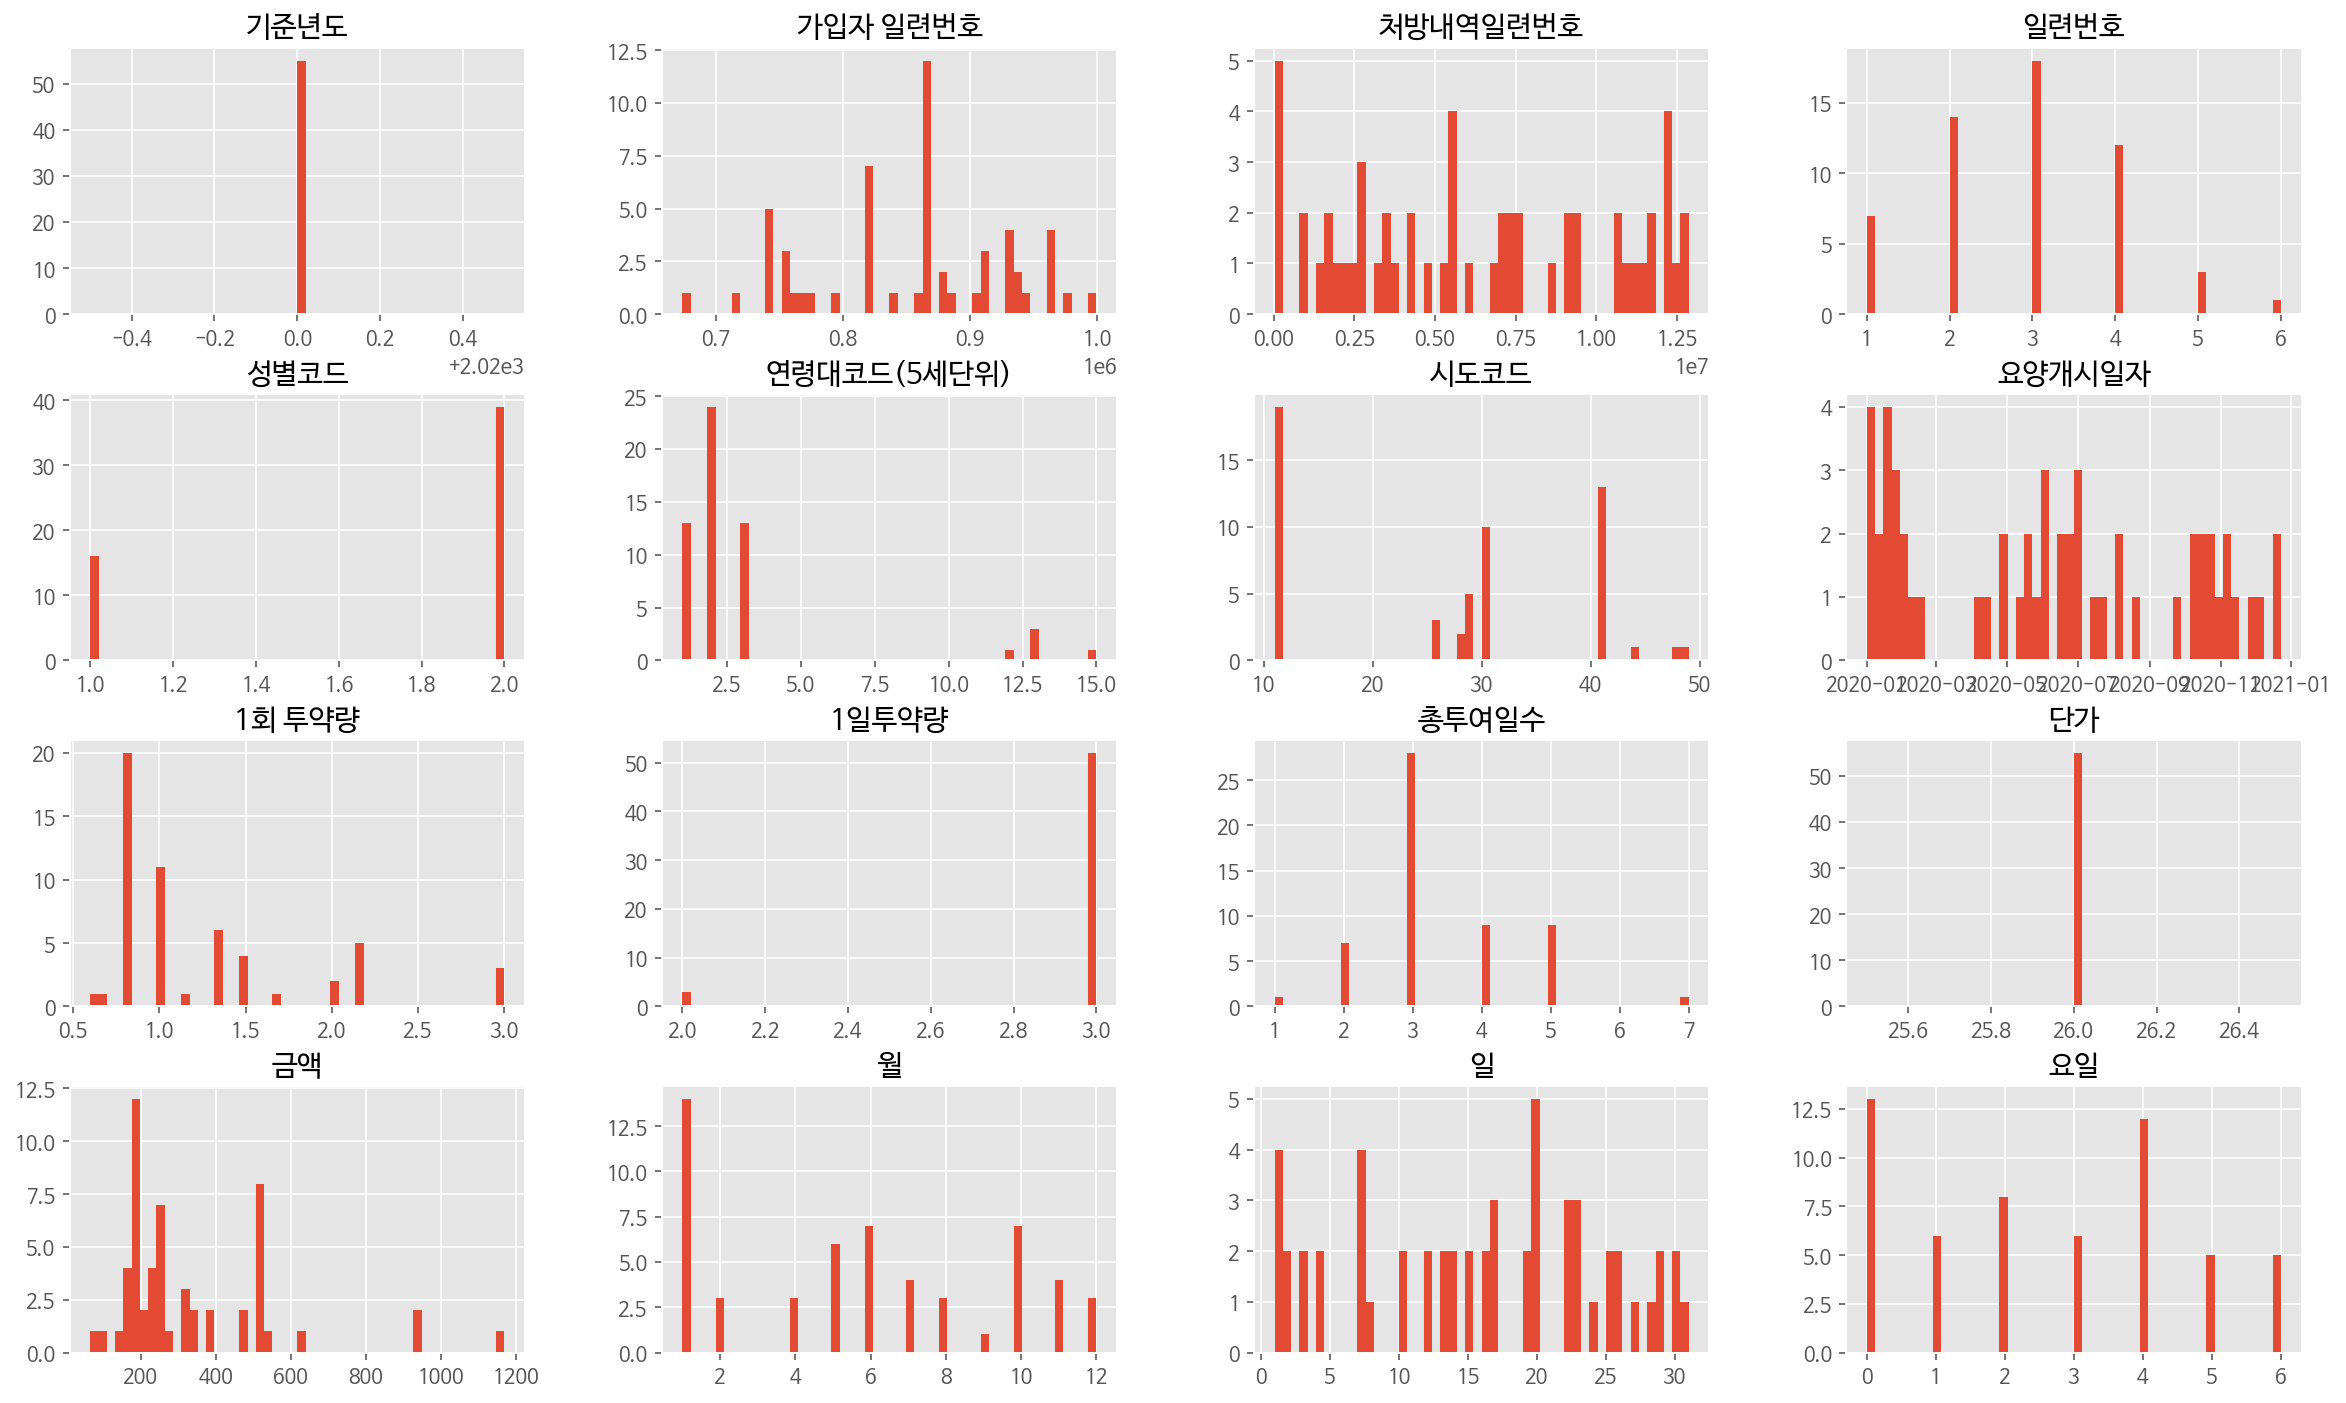

In [ ]:
df.hist(figsize=(20,12), bins=50)
plt.show()

##상관분석

In [ ]:
# df의 상관관계를 구합니다.
corr = df.corr()

In [ ]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

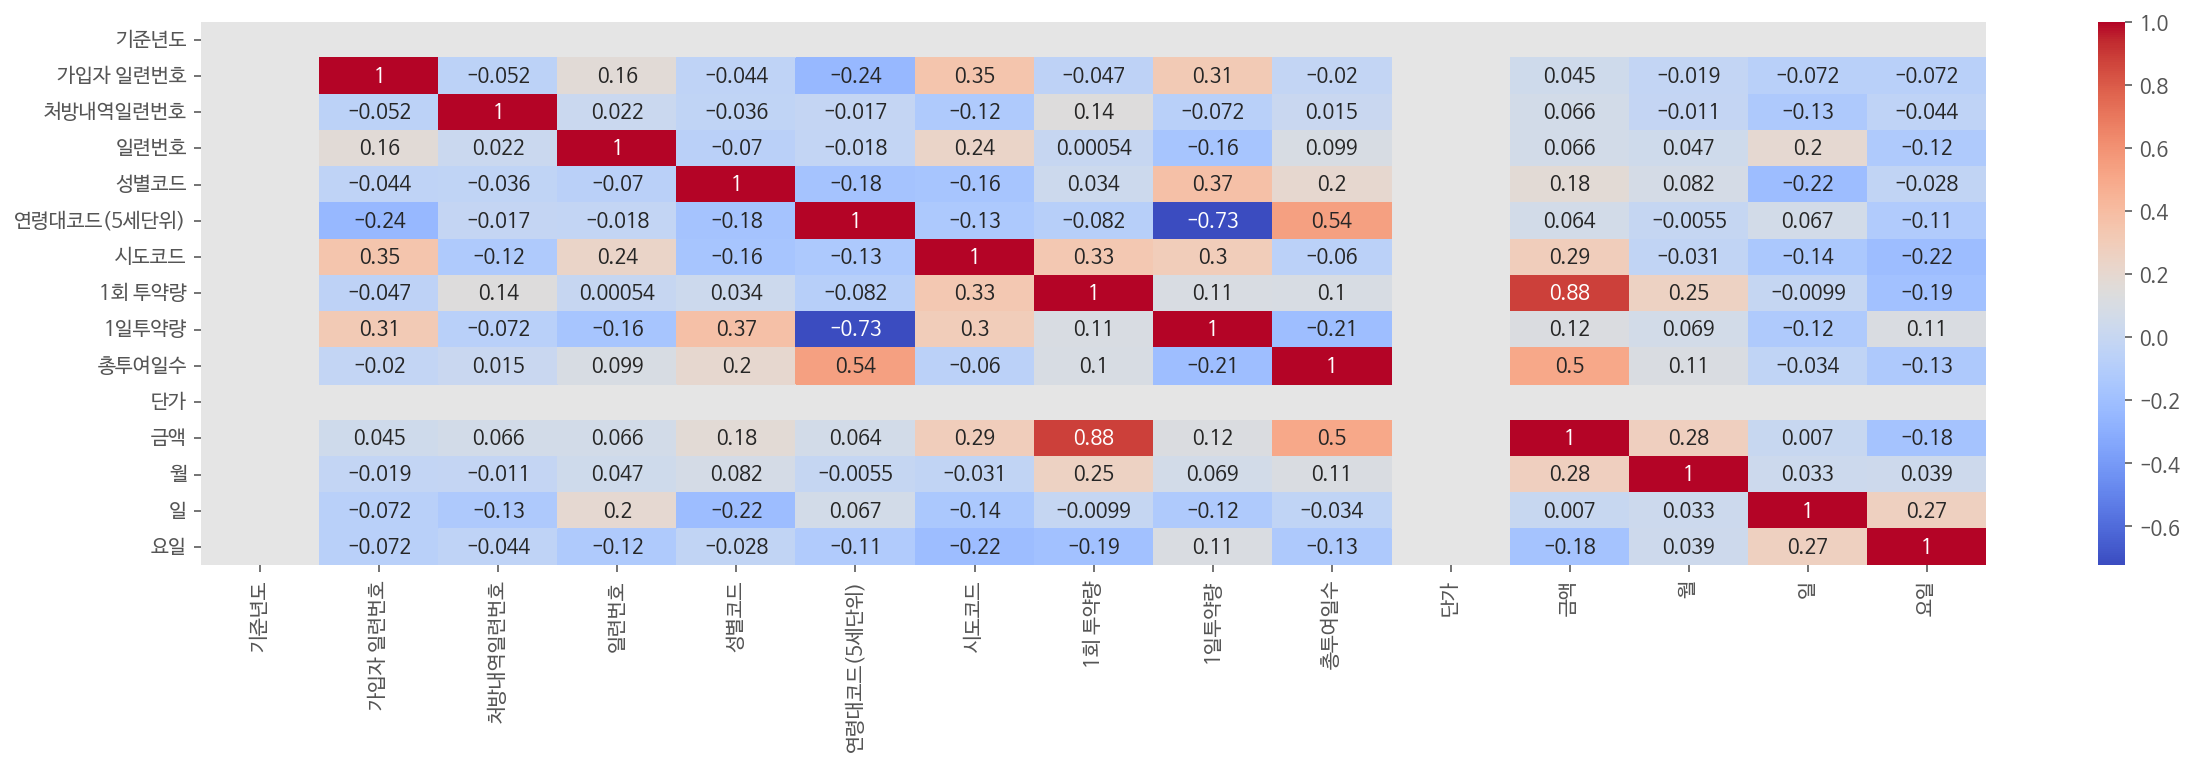

In [ ]:
# NA/null 값을 제외한 열의 쌍별 상관 관계에 대해 heatmap을 그립니다.
plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot = True, cmap="coolwarm")

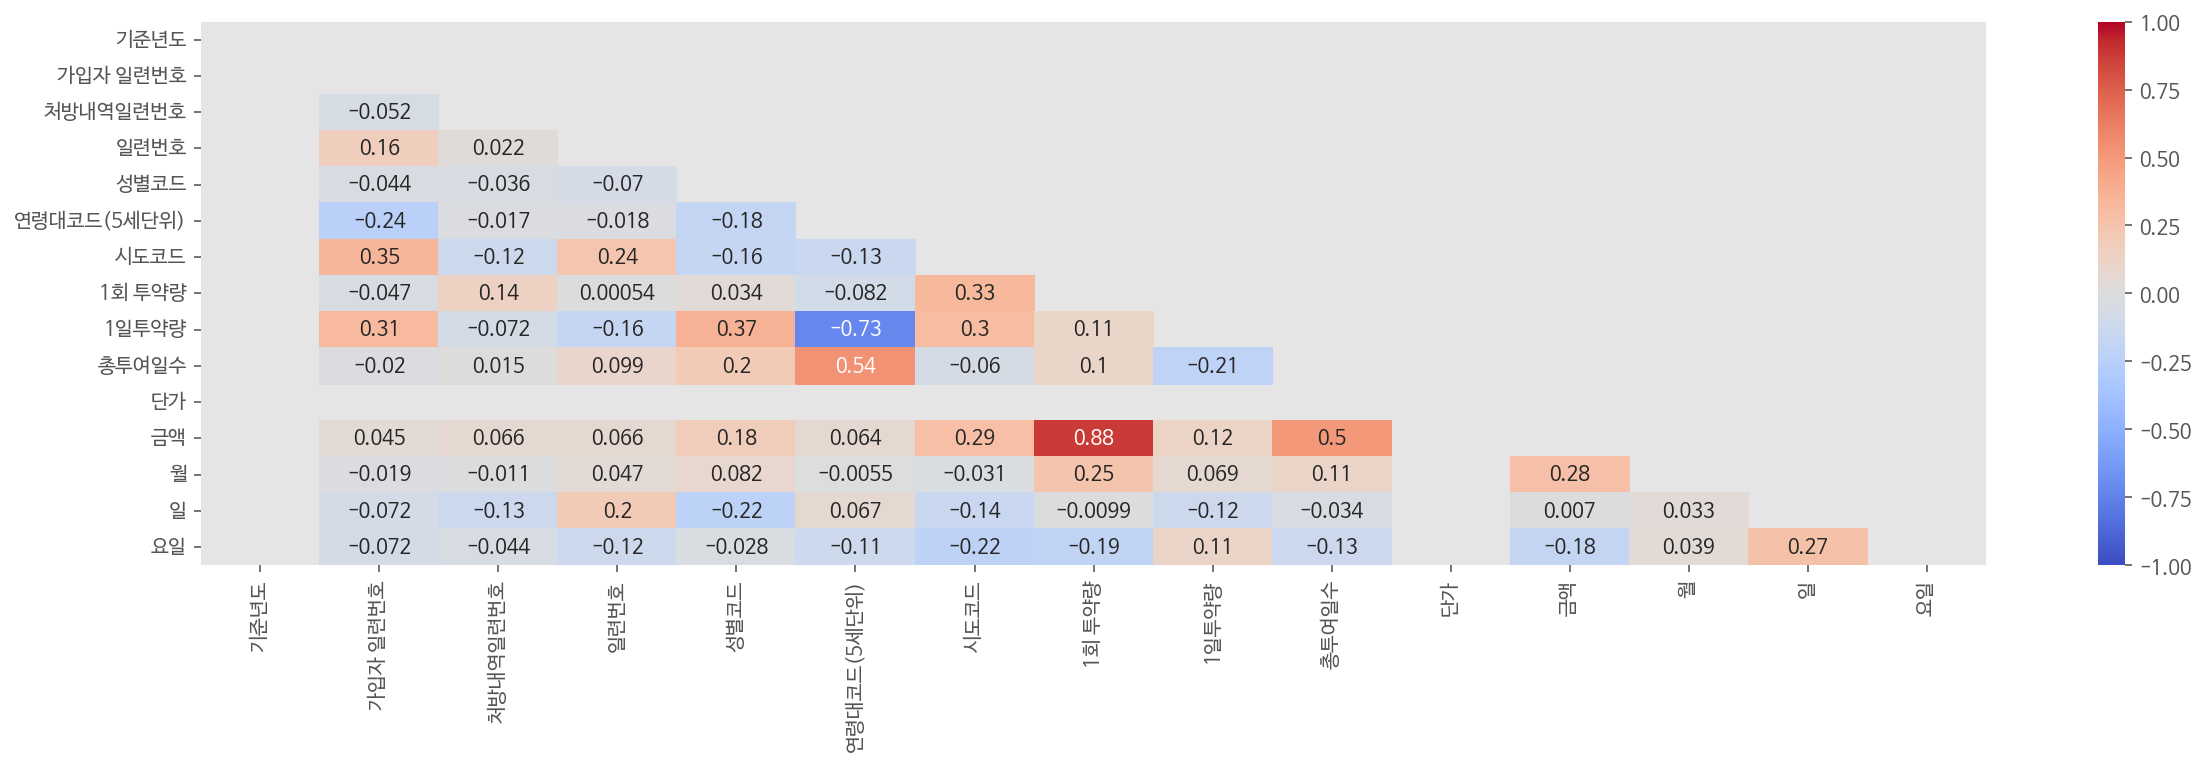

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot = True, cmap="coolwarm", vmin=-1, vmax=1,mask=mask)

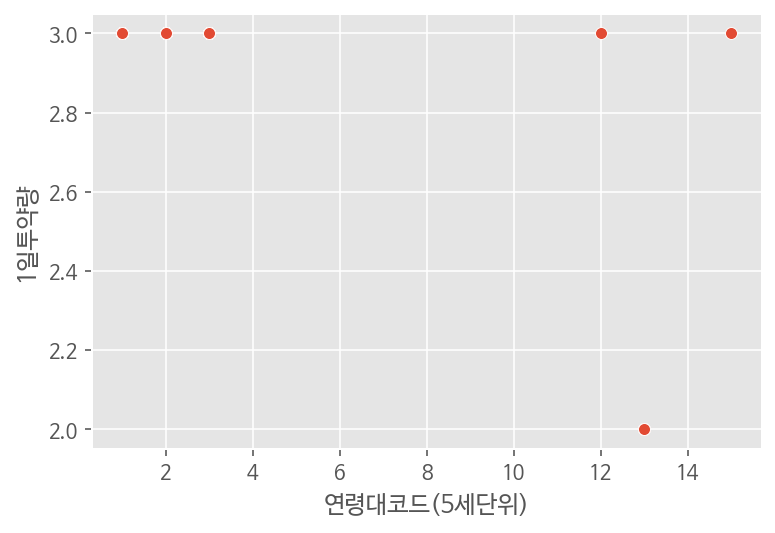

In [ ]:
sns.scatterplot(data=df, x="연령대코드(5세단위)", y="1일투약량")

#기간별처방
## 월별처방수

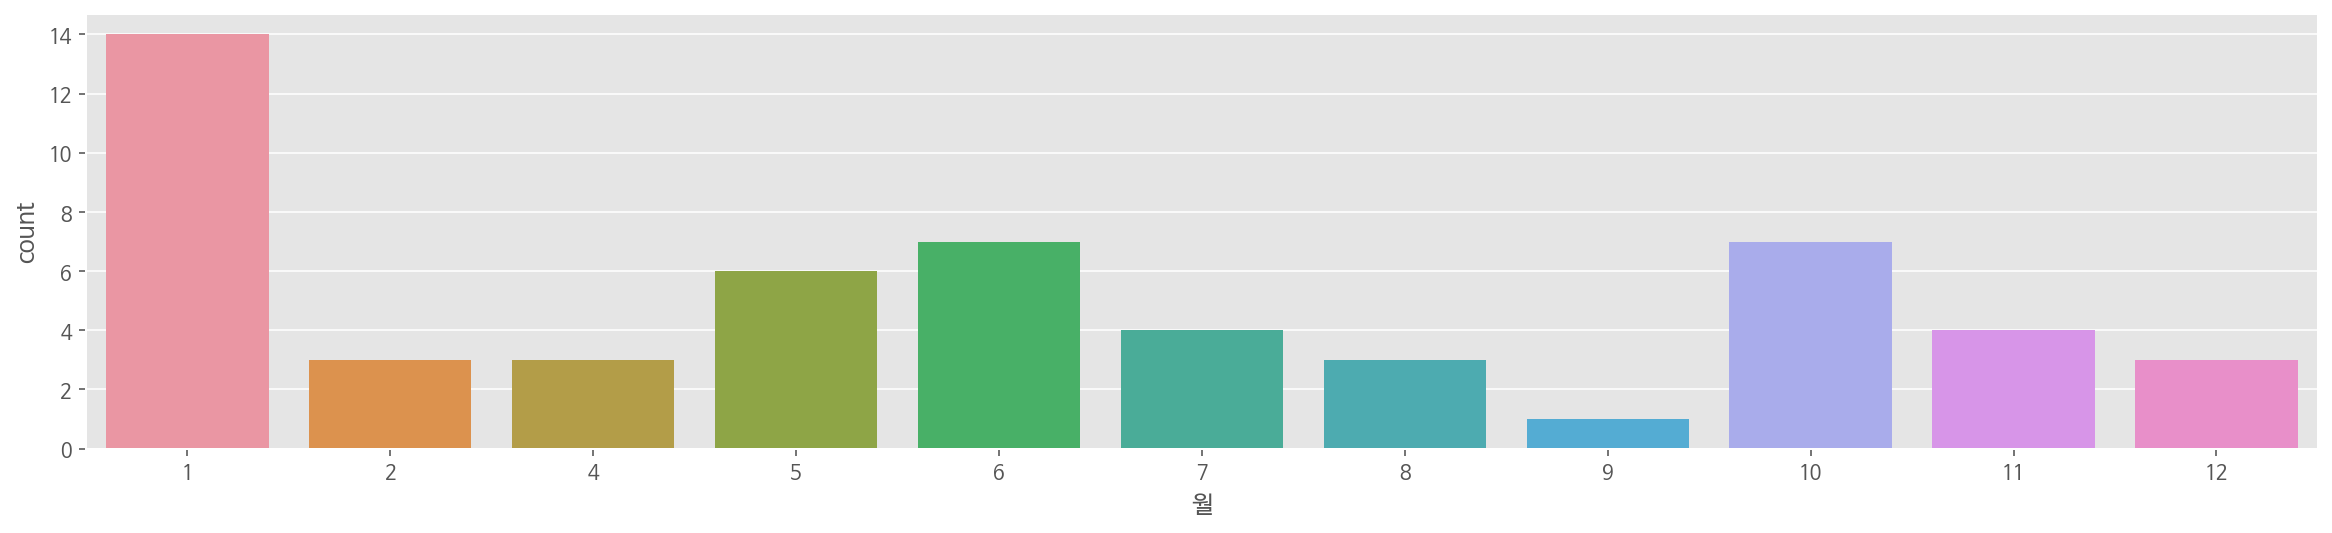

In [ ]:
# 월별 처방 횟수를 시각화합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df,x="월")

##일별처방수

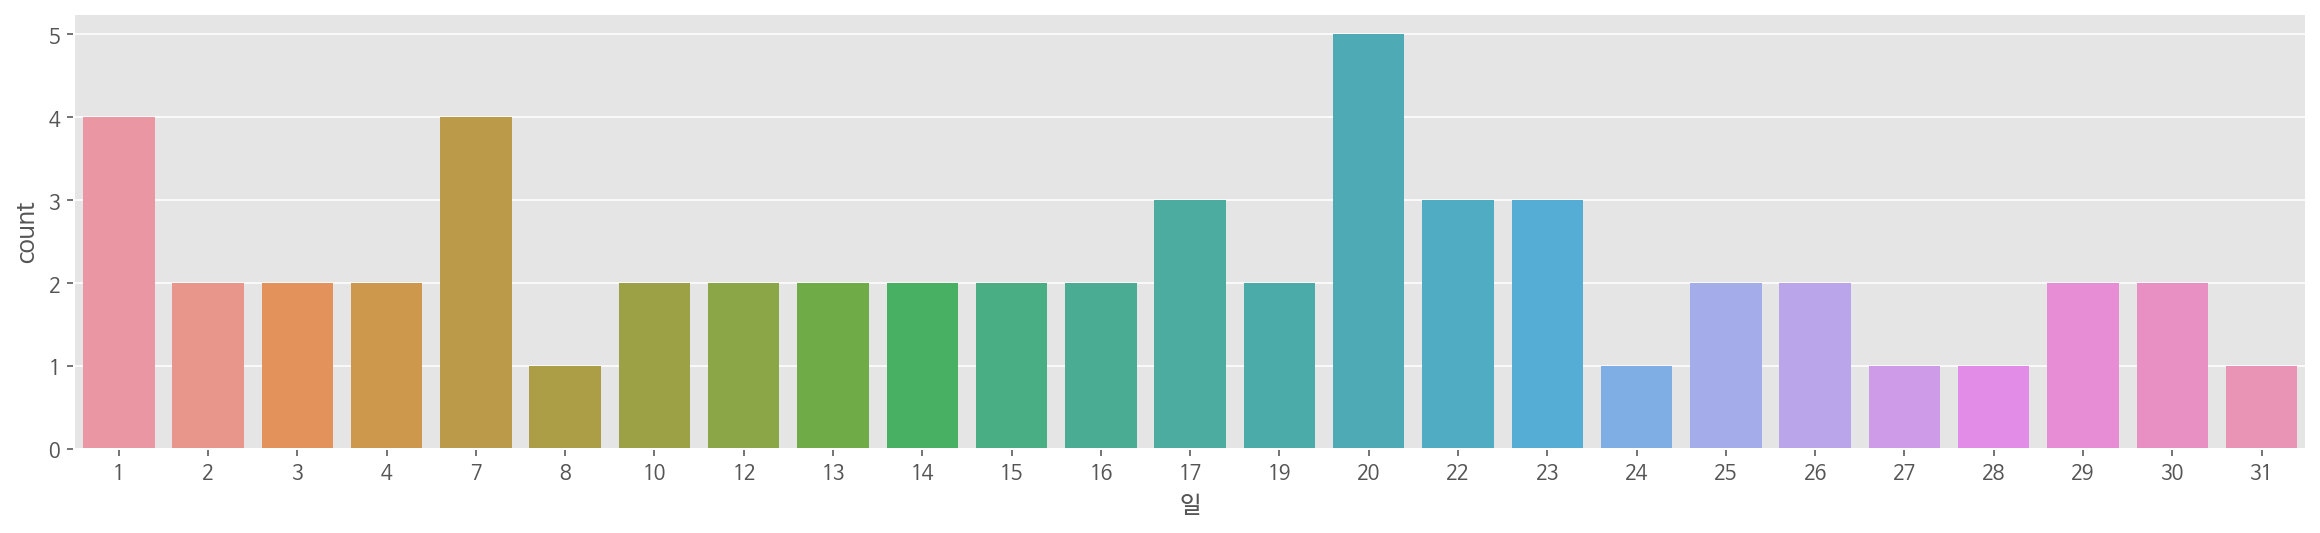

In [ ]:
# 일별 처방횟수를 시각화합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df,x="일")

##요일별 처방수

In [ ]:
def find_weekday(day_no):
    return "월화수목금토일"[day_no]

find_weekday(3)

'목'

In [ ]:
df["요일명"] = df["요일"].map(find_weekday)

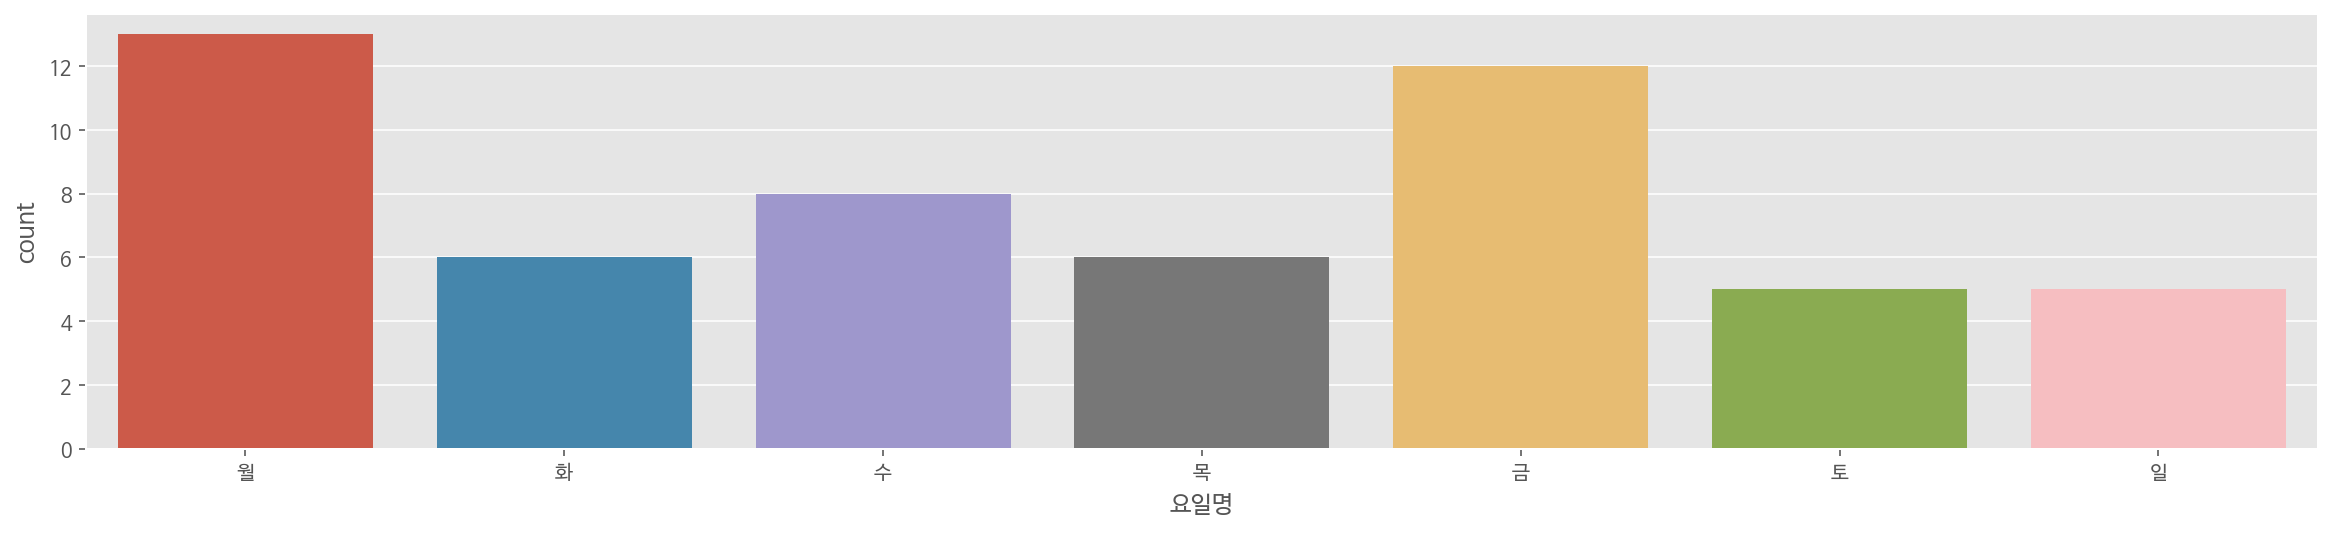

In [ ]:
# 요일별 처방횟수를 시각화합니다.
# 단, 월요일부터 일요일까지 순서대로 출력되어야 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("요일"),x="요일명")

##연령대별 처방수

In [ ]:
df.columns

Index(['기준년도', '가입자 일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드',
       '요양개시일자', '약품일반성분명코드', '1회 투약량', '1일투약량', '총투여일수', '단가', '금액', '월', '일',
       '요일', '영문요일', '시도명', '연령대', '성별', '투여경로', '제형', '투여경로명', '제형명', '요일명'],
      dtype='object')

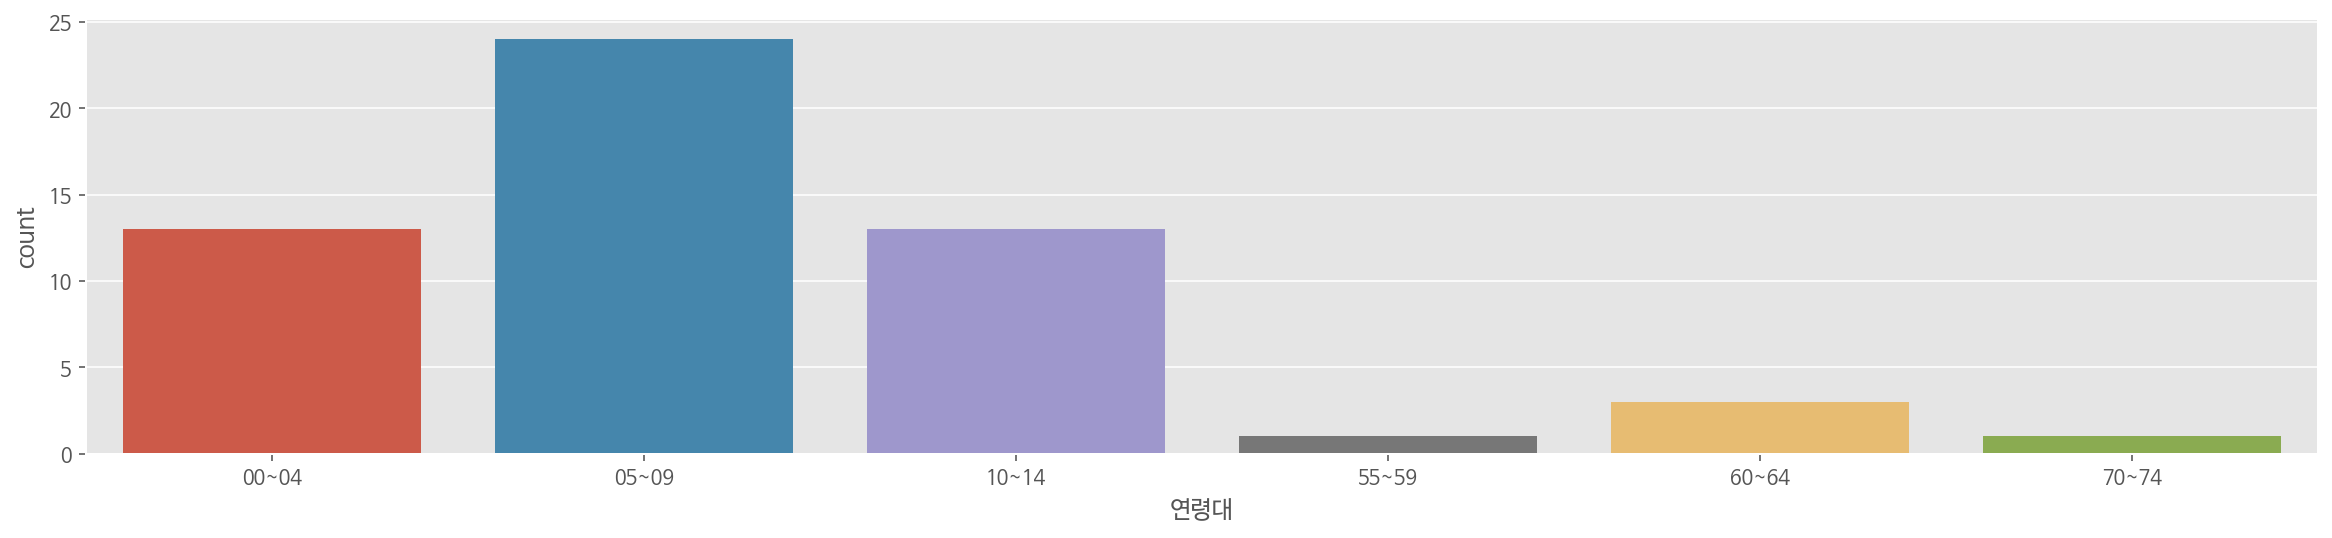

In [ ]:
# 연령대별 처방횟수를 시각화합니다.
# 단, 저연령대부터 고연령대까지 순서대로 출력되어야 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("연령대코드(5세단위)"),x="연령대")

연령대-성별 처방수

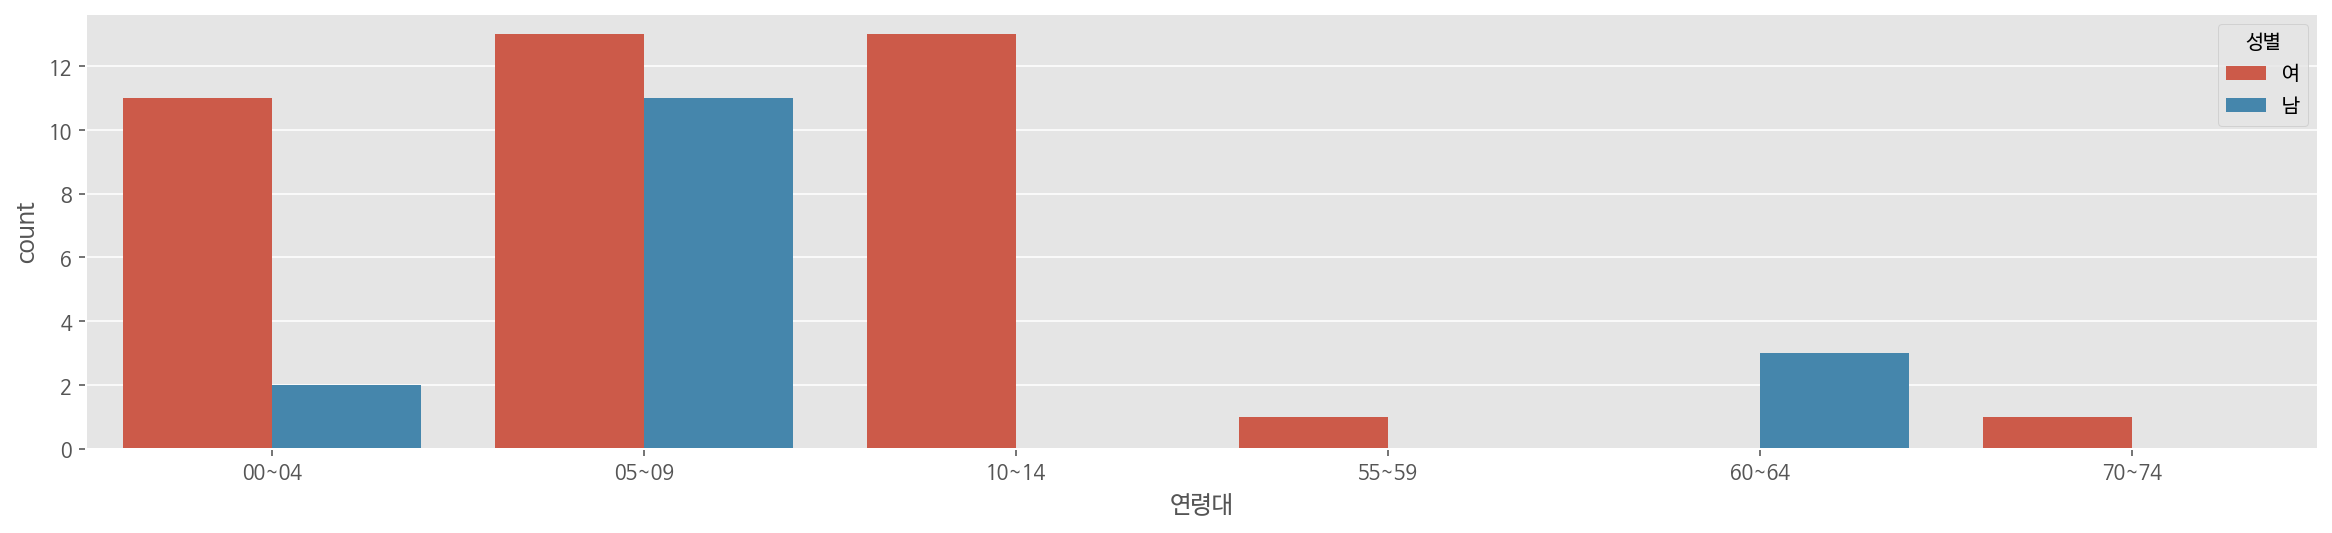

In [ ]:
# 연령별 처방횟수를 순서대로 출력하되 성별을 기준으로 나누어 출력합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("연령대코드(5세단위)"),x="연령대", hue="성별")

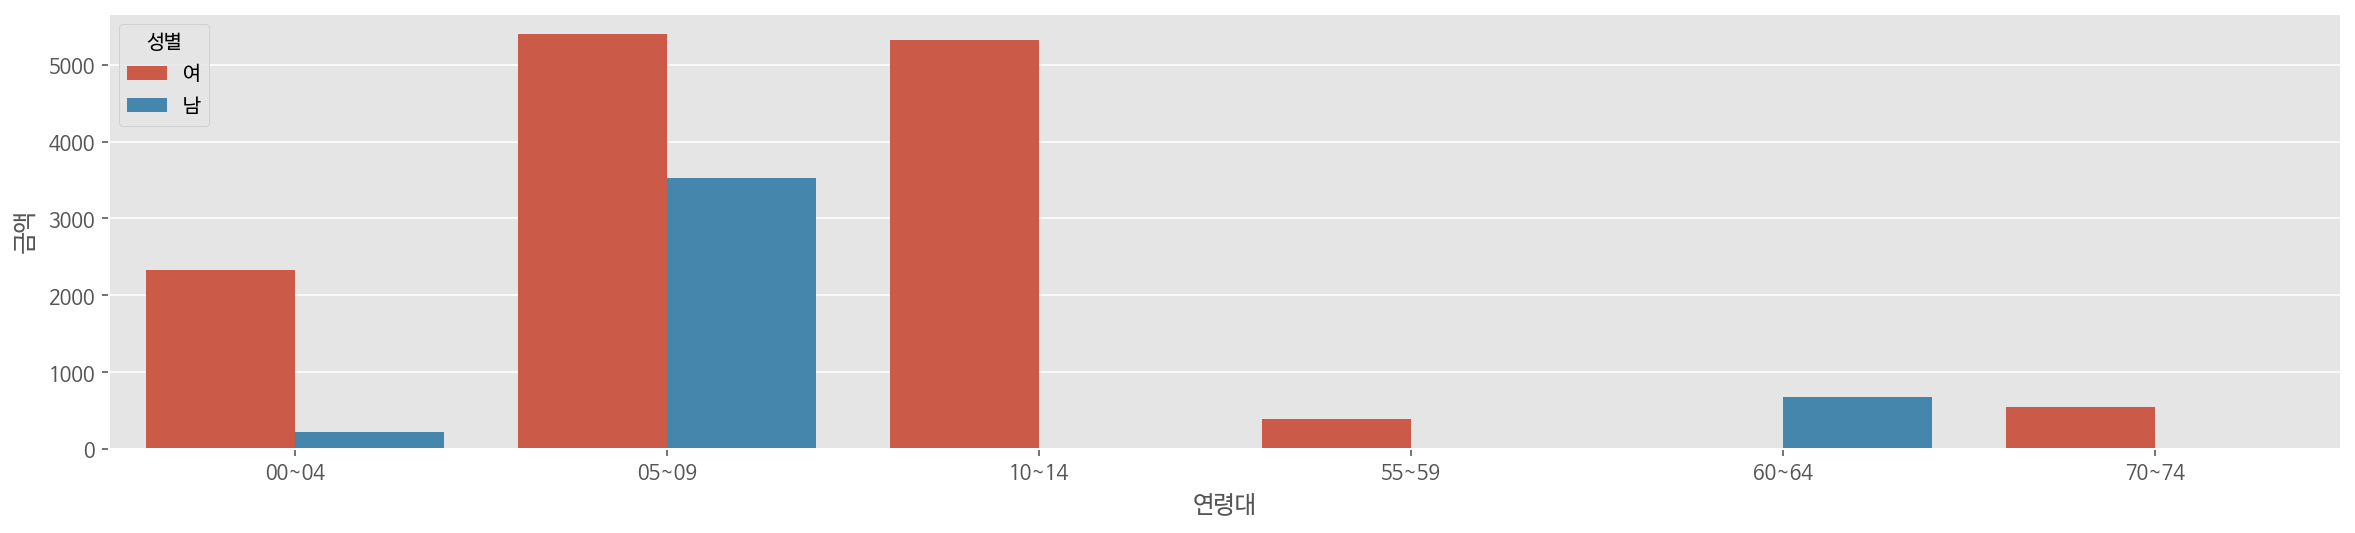

In [ ]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df.sort_values("연령대코드(5세단위)"),x="연령대", y="금액", hue="성별", estimator=np.sum, ci=None)